# SVM On Three Data Sets

### In this notebook I will:
- load the .mat files with scipy.io
- perform feature scaling 
- visualize SVM with linear kernel and then Gaussian Kernel
- find the best C and sigma with GridSearchCV


In [54]:
# Setup environment
import scipy.io
import matplotlib.pyplot as plt 
import matplotlib
import pandas as pd
import numpy as np

%matplotlib inline

In [55]:
# read in data sets 
from scipy.io import loadmat
data1 = loadmat('ex6data1.mat')
data2 = loadmat('ex6data2.mat')
data3 = loadmat('ex6data3.mat')

X1, y1 = data1['X'], data1['y']
X2, y2 = data2['X'], data2['y']
X3, y3 = data3['X'], data3['y']
X = [X1, X2, X3]
y = [y1, y2, y3]

In [63]:
# scale features
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

for i in np.arange(0, 3):
#     scaler.fit(X[i])
#     X[i] = scaler.transform(X[i])
    X[i] = scaler.fit_transform(X[i])
    
X1, X2, X3 = X
y1, y2, y3 = y

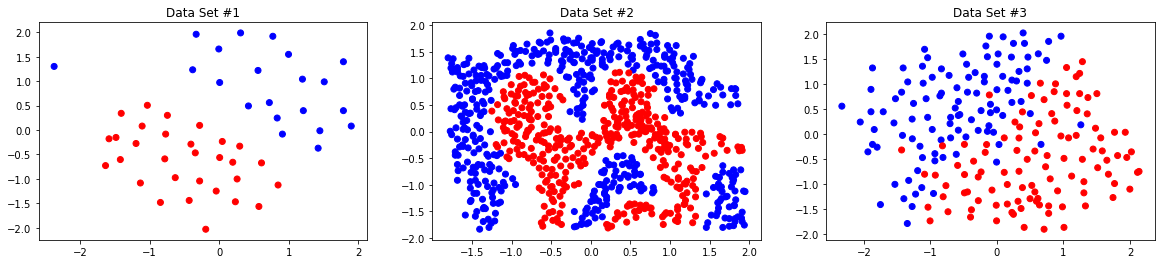

In [104]:
# Visualize 3 data sets
fig, axs = plt.subplots(figsize=[20, 4], nrows=1, ncols=3)

for i in np.arange(0, 3, 1):
    axs[i].scatter(X[i][:, 0], X[i][:, 1], color=["r" if y == 0 else "b" for y in y[i]])
    axs[i].set_title("Data Set #%i" % (i+1,))

In [126]:
# Try a linear kernel
from sklearn.svm import LinearSVC

clf_bias = LinearSVC(loss='hinge', C=1.0)
ytemp = y1.reshape(y1.shape[0],)
clf_bias.fit(X1, ytemp)

clf_variance = LinearSVC(loss='hinge', C=100, max_iter=2000)
clf_variance.fit(X1, ytemp)

LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=2000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [127]:
clf_bias.coef_

array([[1.32936094, 1.84951763]])

Text(0.5, 1.0, 'Data Set #3')

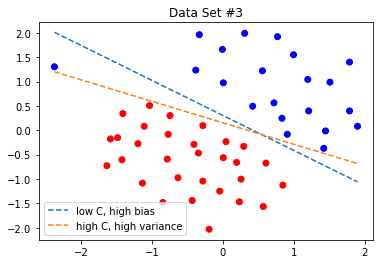

In [129]:
# Make line values from decision boundary lines
x1s = np.linspace(min(X1[:, 0]), max(X1[:, 0]), 20)
x2s_bias = (-clf_bias.intercept_ - clf_bias.coef_[0][0]*x1s)/clf_bias.coef_[0][1]
x2s_variance = (-clf_variance.intercept_ - clf_variance.coef_[0][0]*x1s)/clf_variance.coef_[0][1]

# visualize decision boundary 
fig, ax = plt.subplots()
ax.scatter(X1[:, 0], X1[:, 1], color=["r" if y == 0 else "b" for y in y1])
ax.plot(x1s, x2s_bias, linestyle="--", label="low C, high bias")
ax.plot(x1s, x2s_variance, linestyle="--", label="high C, high variance")
ax.legend(loc="lower left")
ax.set_title("Data Set #%i" % (i+1,))

In [118]:
# Try a gaussian kernel
from sklearn.svm import SVC

ytemp = y2.reshape(y2.shape[0],)

clf_bias = SVC(kernel='rbf', C=1.0)
clf_bias.fit(X2, ytemp)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [123]:
clf_var = SVC(kernel='rbf', C=10000)
clf_var.fit(X2, ytemp)

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [124]:
clf_bias.score(X2, ytemp), clf_var.score(X2, ytemp)

(0.9049826187717266, 0.996523754345307)

In [ ]:
# Generate a set of points that form a grid over feature space
x1s = np.linspace(min(X2[:, 0]), max(X2[:, 0]), 600)
x2s = np.linspace(min(X2[:, 1]), max(X2[:, 1]), 600)
points = np.array([[x1, x2] for x1 in x1s for x2 in x2s])

# Compute decision function for each point, keep those which are close to the boundary
dist_bias = svm_bias.decision_function(points)
bounds_bias = np.array([pt for pt, dist in zip(points, dist_bias) if abs(dist)<0.05])

dist_var = svm_var.decision_function(points)
bounds_var = np.array([pt for pt, dist in zip(points, dist_var) if abs(dist)<0.05])